In [36]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("musics.csv")

# Define the class ranges for popularity
popularity_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
popularity_labels = [f"{low}-{high}" for low, high in popularity_ranges]

# Create a new column for popularity classes
data["popularity_class"] = pd.cut(data["popularity"], bins=[0] + [low for low, _ in popularity_ranges] + [100],
                                  labels=popularity_labels, right=False, duplicates='drop')

# Drop irrelevant columns (artist, song, year, popularity)
data = data.drop(columns=["artist", "song", "year", "popularity"])

# Convert explicit column to 1s and 0s
data["explicit"] = data["explicit"].astype(int)
# Extract all unique genres
all_genres = set()
for genres in data["genre"].str.split(", "):
    all_genres.update(genres)

# Create binary genre vector column

data["genre_vector"] = ""
for index, row in data.iterrows():
    genre_vector = ""
    for genre in all_genres:
        if genre in row["genre"]:
            genre_vector += "1"
        else:
            genre_vector += "0"
    data.at[index, "genre_vector"] = genre_vector
genre_indices = {}
i = 0

for genre in all_genres:
    genre_indices[genre] = i
    i += 1
print(genre_indices)
    

# Drop the original genre column
data = data.drop(columns=["genre"])

# Save the preprocessed data to a new CSV file
data.to_csv("musics_preprocessed.csv", index=False)
print(data.head())


{'jazz': 0, 'Dance/Electronic': 1, 'blues': 2, 'pop': 3, 'classical': 4, 'latin': 5, 'R&B': 6, 'World/Traditional': 7, 'set()': 8, 'country': 9, 'metal': 10, 'rock': 11, 'hip hop': 12, 'Folk/Acoustic': 13, 'easy listening': 14}
   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       211160         0         0.751   0.834    1    -5.444     0   
1       167066         0         0.434   0.897    0    -4.918     1   
2       250546         0         0.529   0.496    7    -9.007     1   
3       224493         0         0.551   0.913    0    -4.063     0   
4       200560         0         0.614   0.928    8    -4.806     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0437        0.3000          0.000018    0.3550    0.894   95.053   
1       0.0488        0.0103          0.000000    0.6120    0.684  148.726   
2       0.0290        0.1730          0.000000    0.2510    0.278  136.859   
3       0.0466        0.0263     

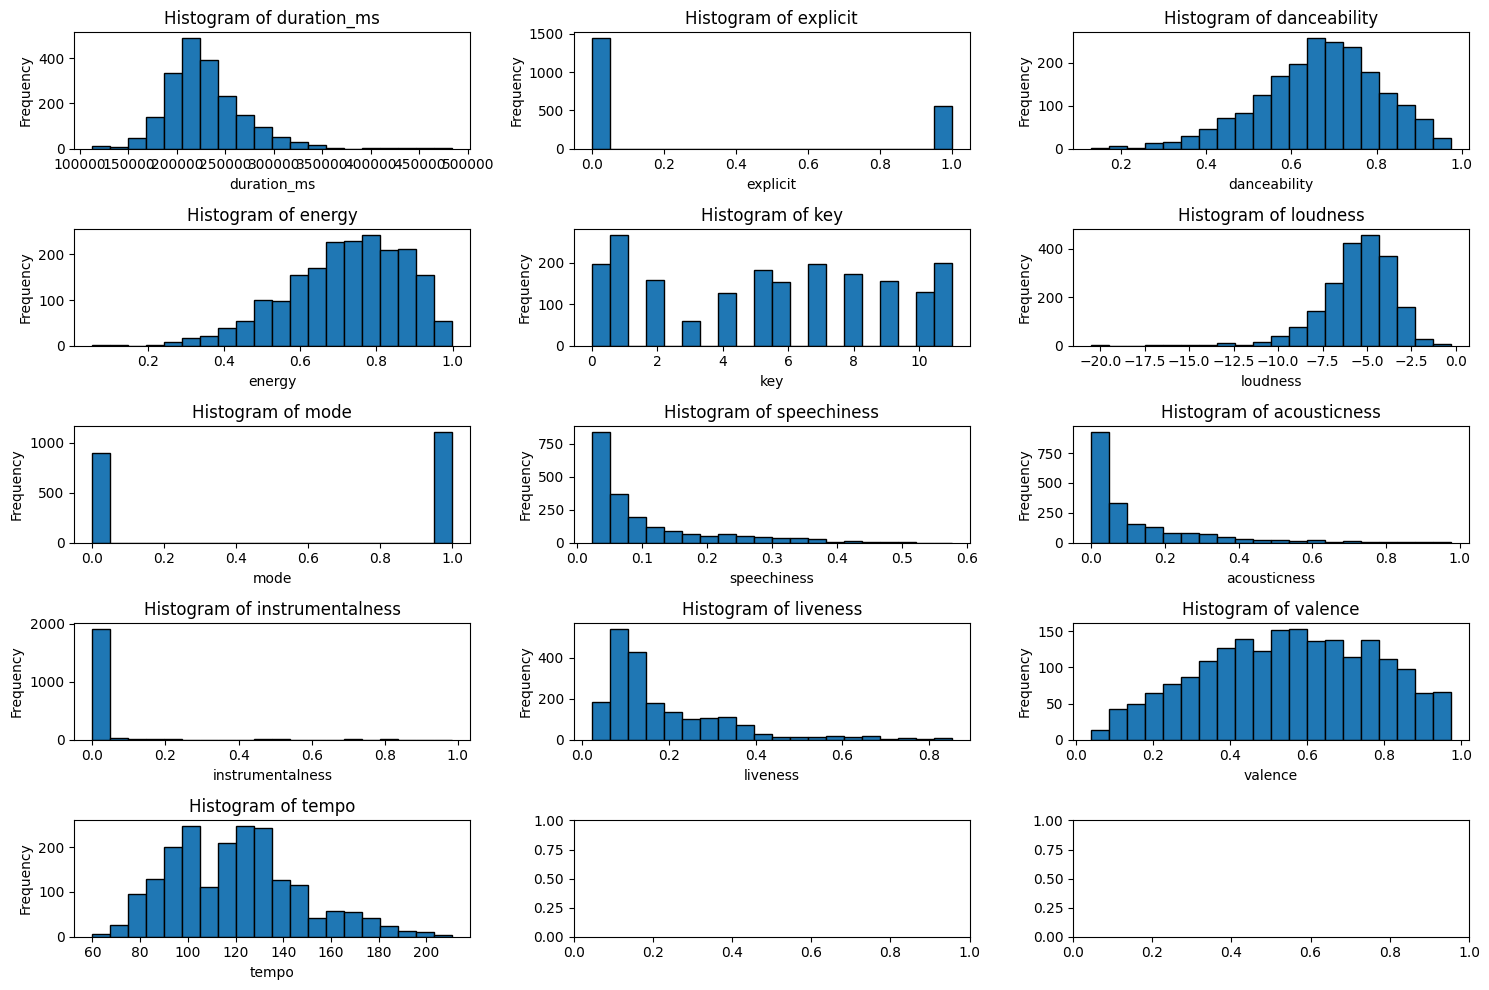

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the list of features (excluding "genre_vector" and "popularity_class")
features = data.drop(columns=["genre_vector", "popularity_class"]).columns

# Set up the subplot grid
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot histograms for each feature
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(data[feature], bins=20, edgecolor='black')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_title(f"Histogram of {feature}")

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


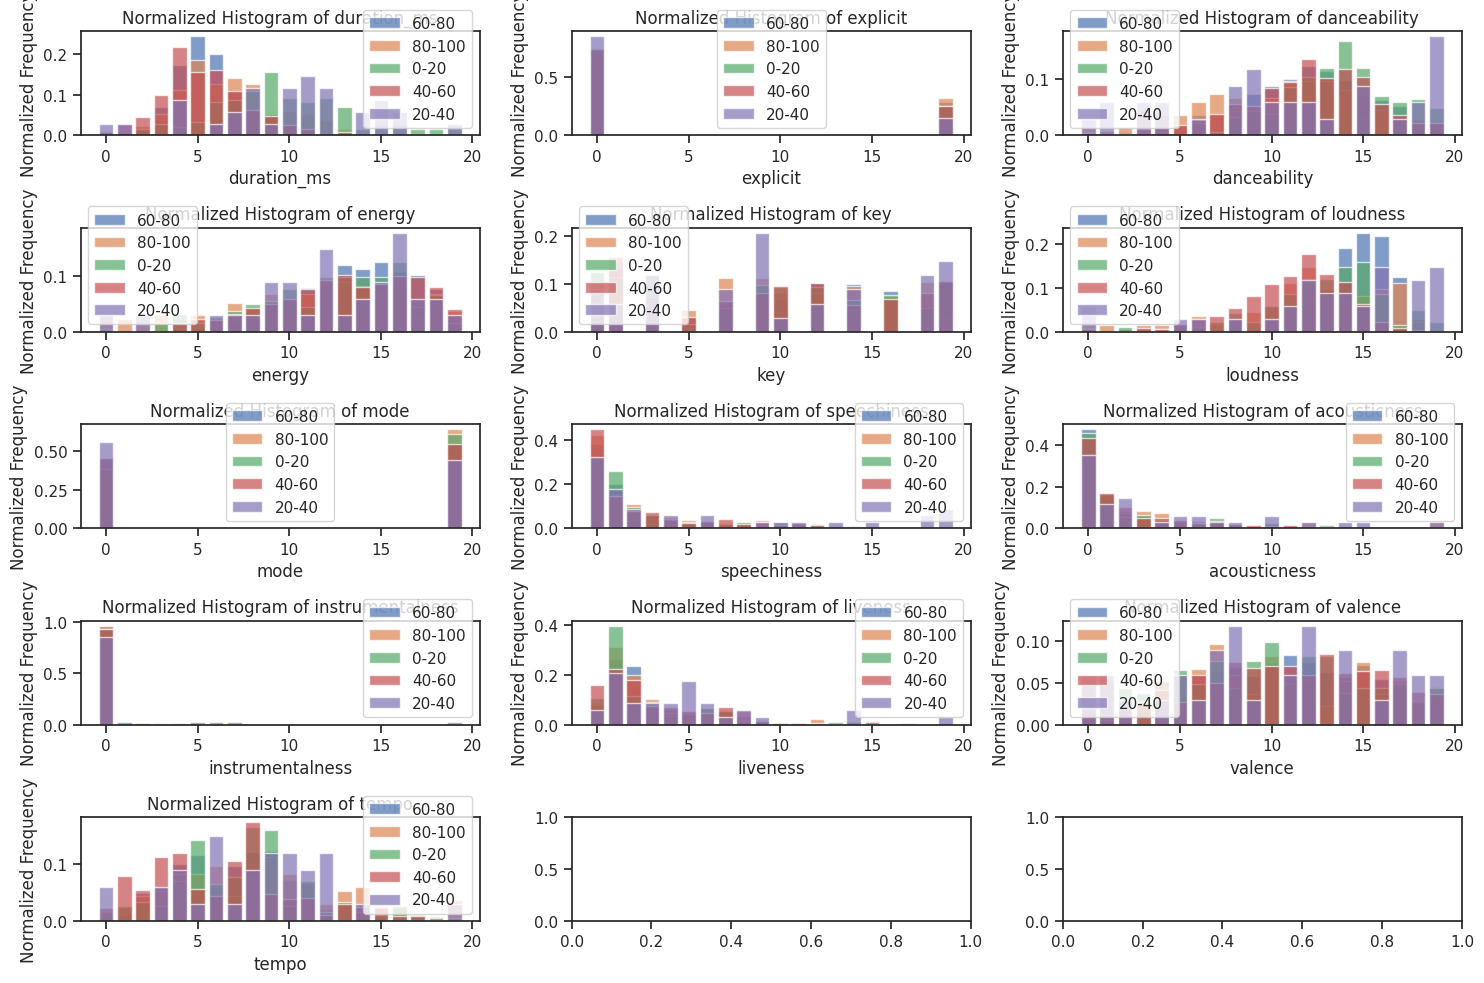

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the preprocessed CSV file
data = pd.read_csv("musics_preprocessed.csv")

# Get the list of features
features = data.drop(columns=["genre_vector", "popularity_class"]).columns

# Get the unique popularity classes
popularity_classes = data["popularity_class"].unique()

# Set up the subplot grid
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot histograms for each feature
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    
    # Create an array to store normalized values for each popularity class
    normalized_values = []
    
    # Compute the normalized values for each popularity class
    for cls in popularity_classes:
        data_cls = data[data["popularity_class"] == cls]
        hist, _ = np.histogram(data_cls[feature], bins=20)
        normalized_hist = hist / np.sum(hist)
        normalized_values.append(normalized_hist)
    
    # Plot the normalized histograms for each popularity class
    for j, cls in enumerate(popularity_classes):
        axes[row, col].bar(range(20), normalized_values[j], alpha=0.7, label=cls)

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Normalized Frequency")
    axes[row, col].set_title(f"Normalized Histogram of {feature}")
    axes[row, col].legend()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


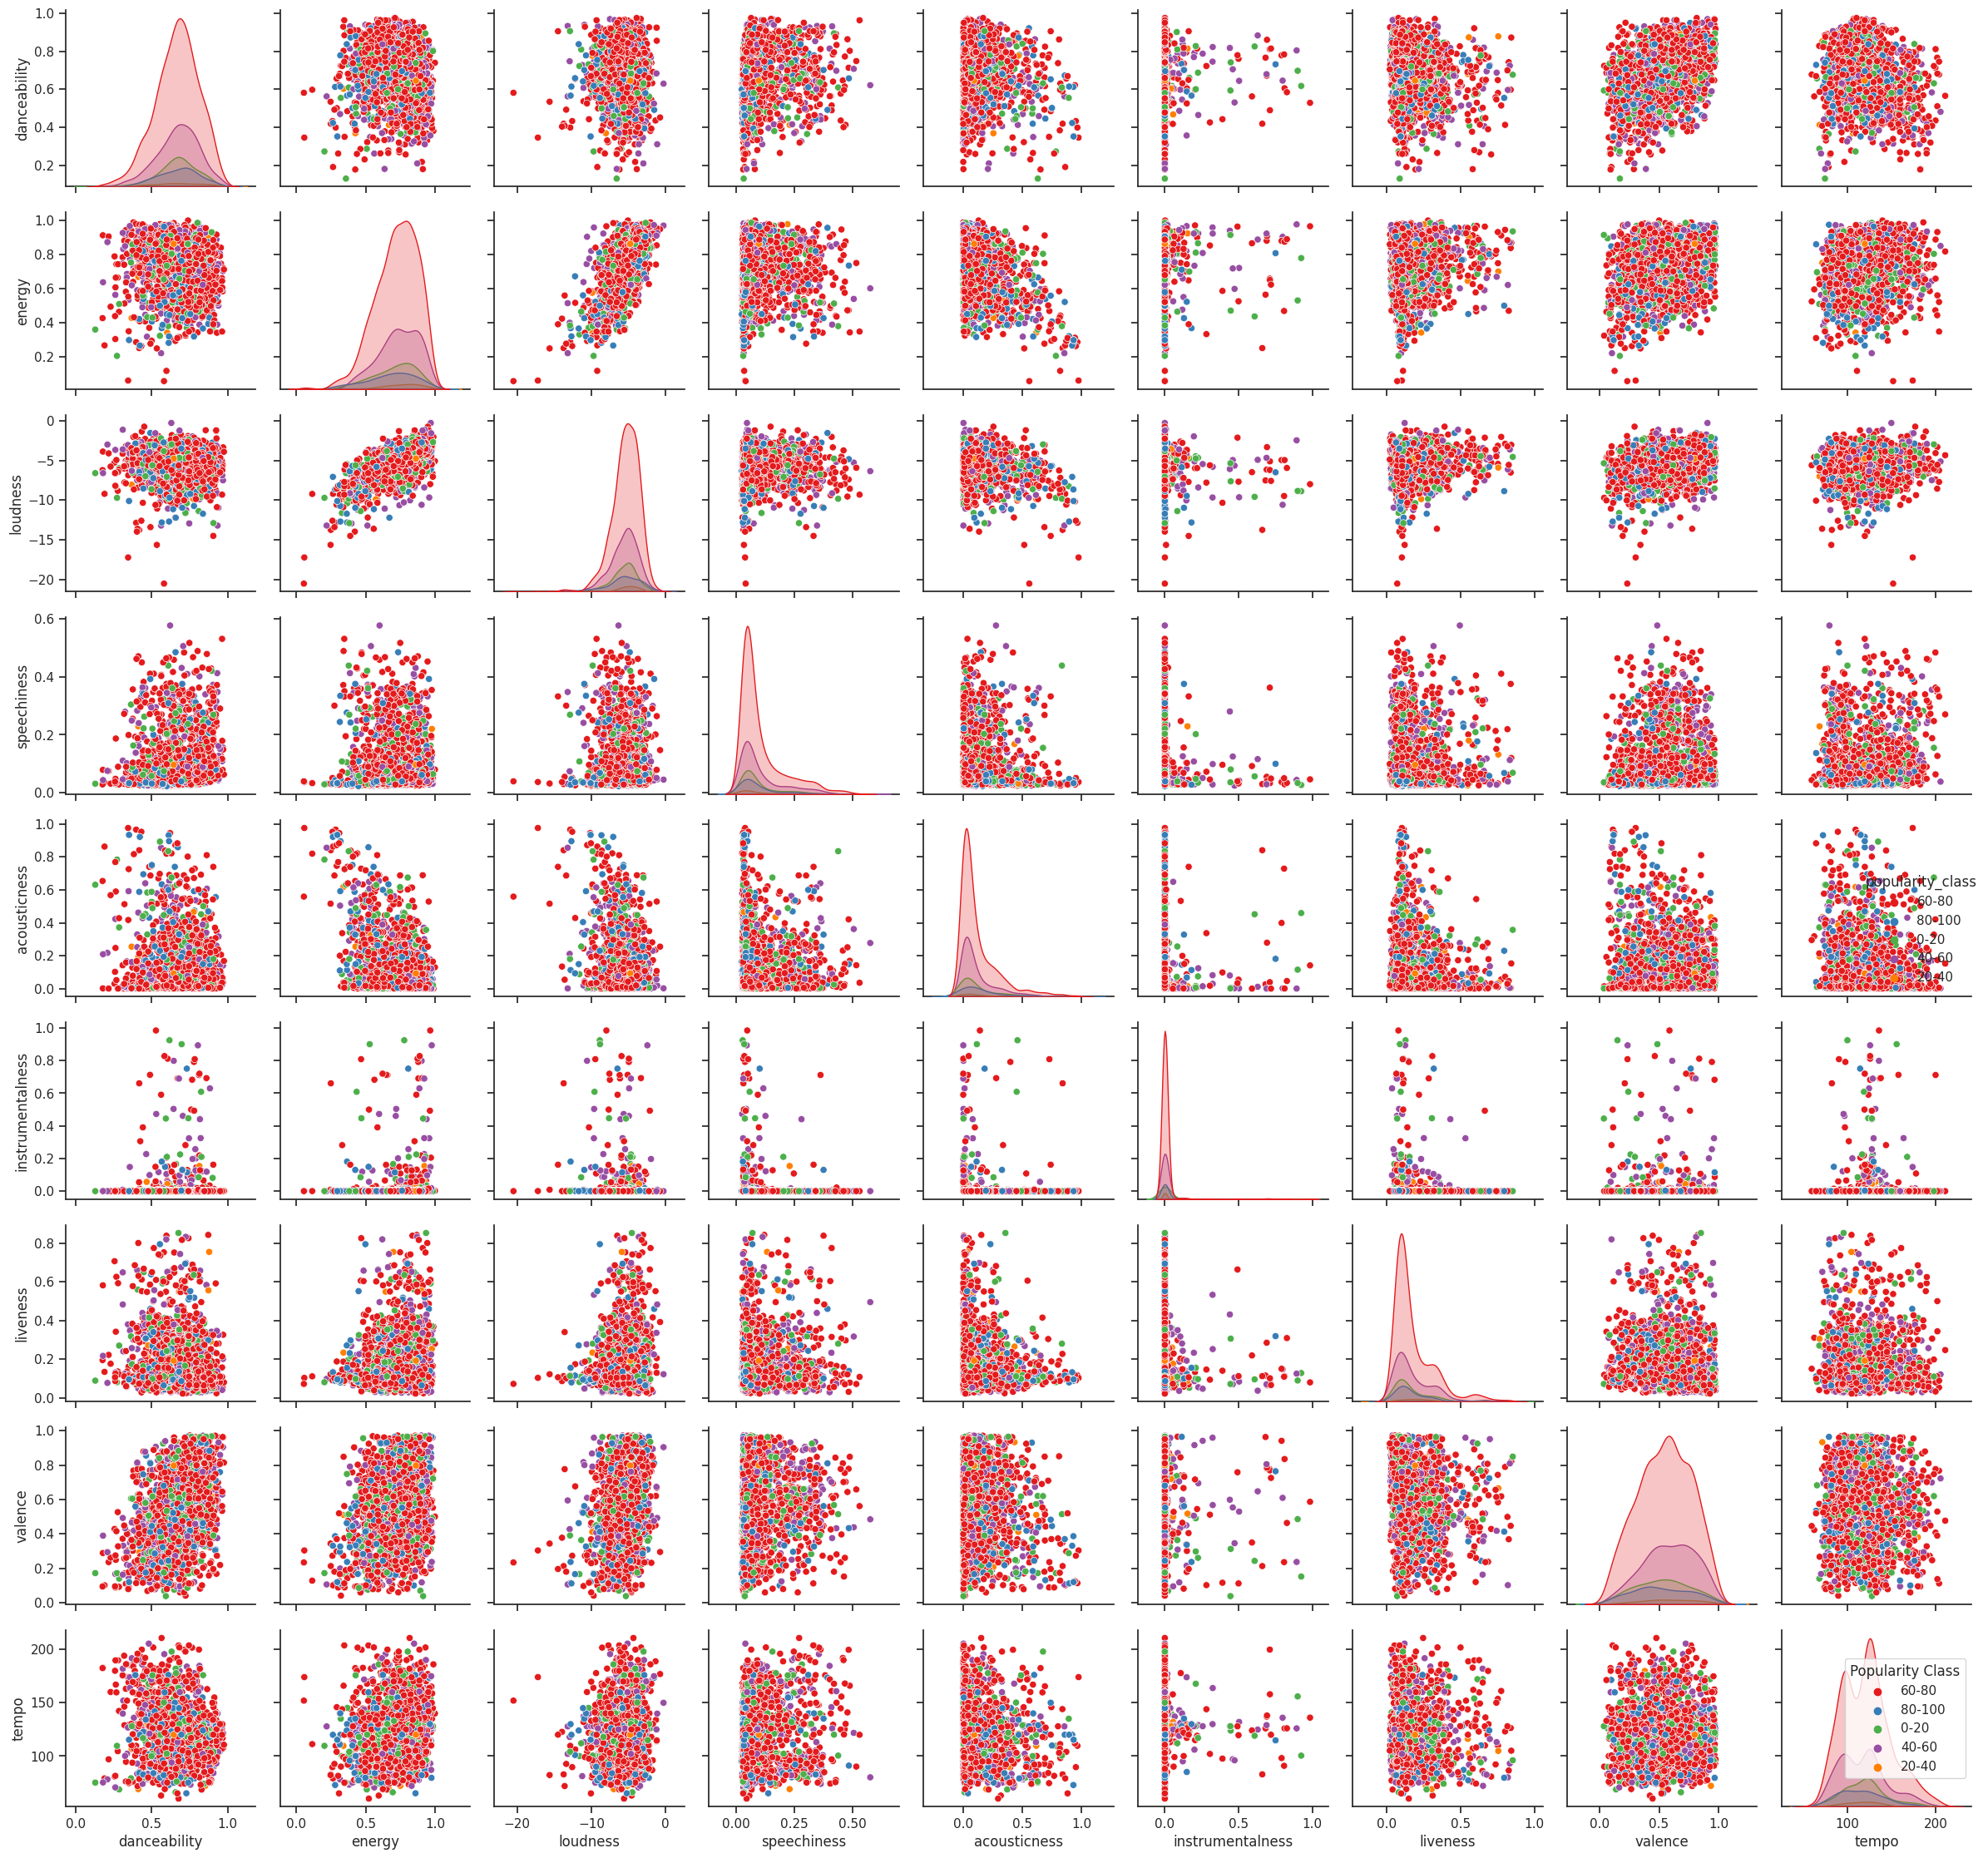

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the preprocessed CSV file
data = pd.read_csv("musics_preprocessed.csv")

# Set the style of the pairplot
sns.set(style="ticks")

# Plot the pairplot with different colors for each popularity class
g = sns.pairplot(data, vars=["danceability", "energy", "loudness", "speechiness", "acousticness",
                            "instrumentalness", "liveness", "valence", "tempo"],
                 hue="popularity_class", palette="Set1")

# Add a legend
handles, labels = g._legend_data.values(), data["popularity_class"].unique()
legend = plt.legend(handles, labels, title="Popularity Class", loc="center right")
plt.setp(legend.get_title(), fontsize=12)  # Set legend title font size

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


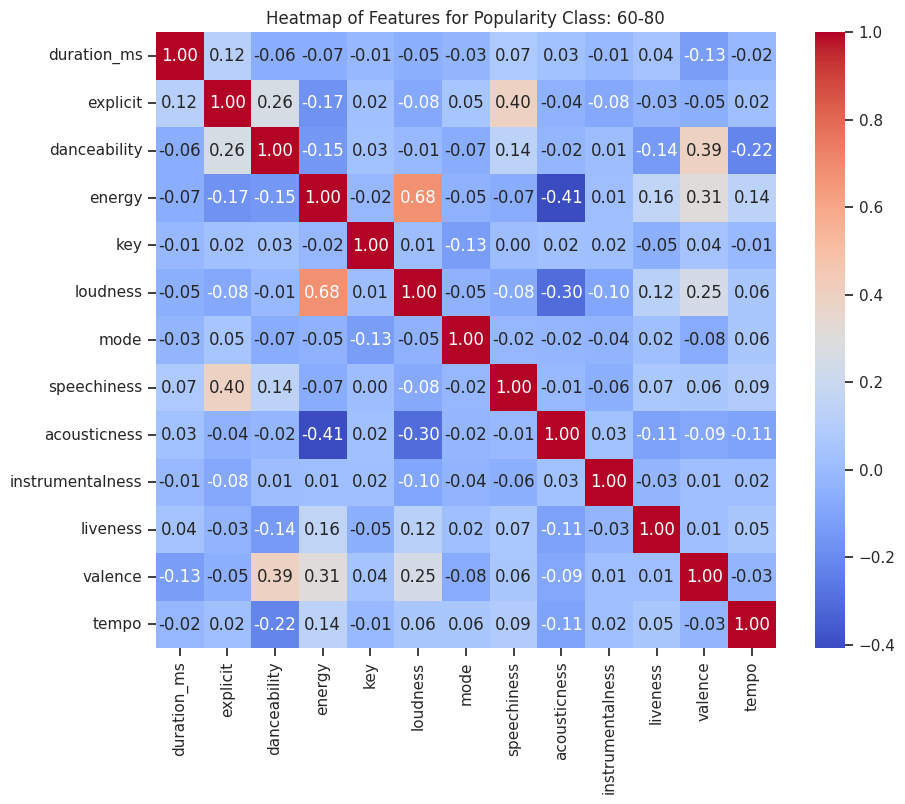

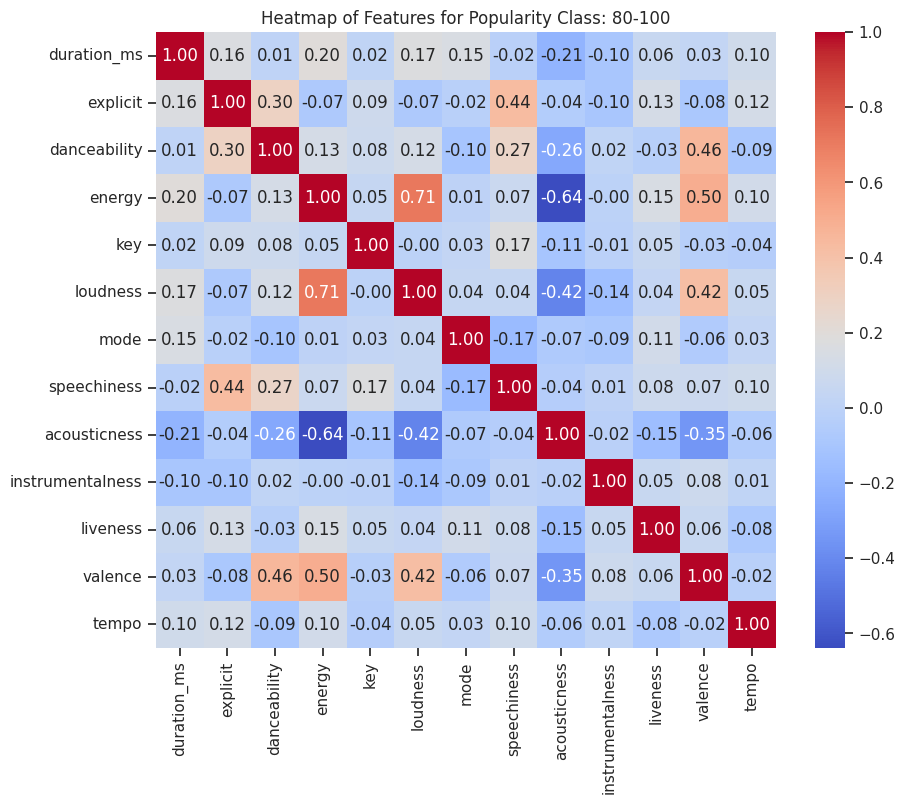

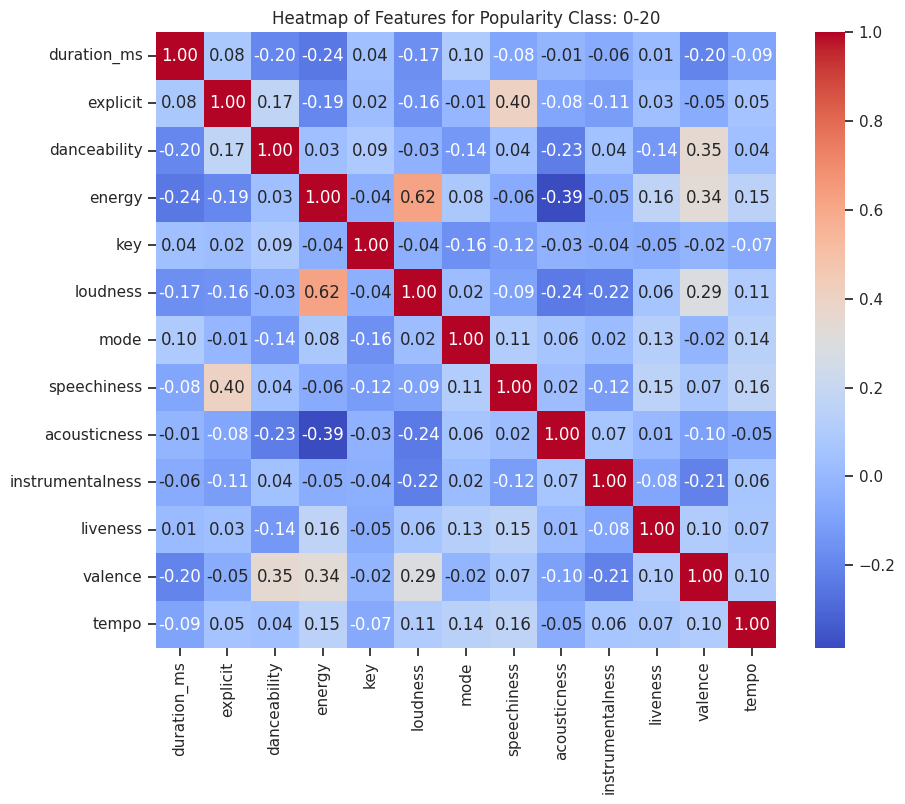

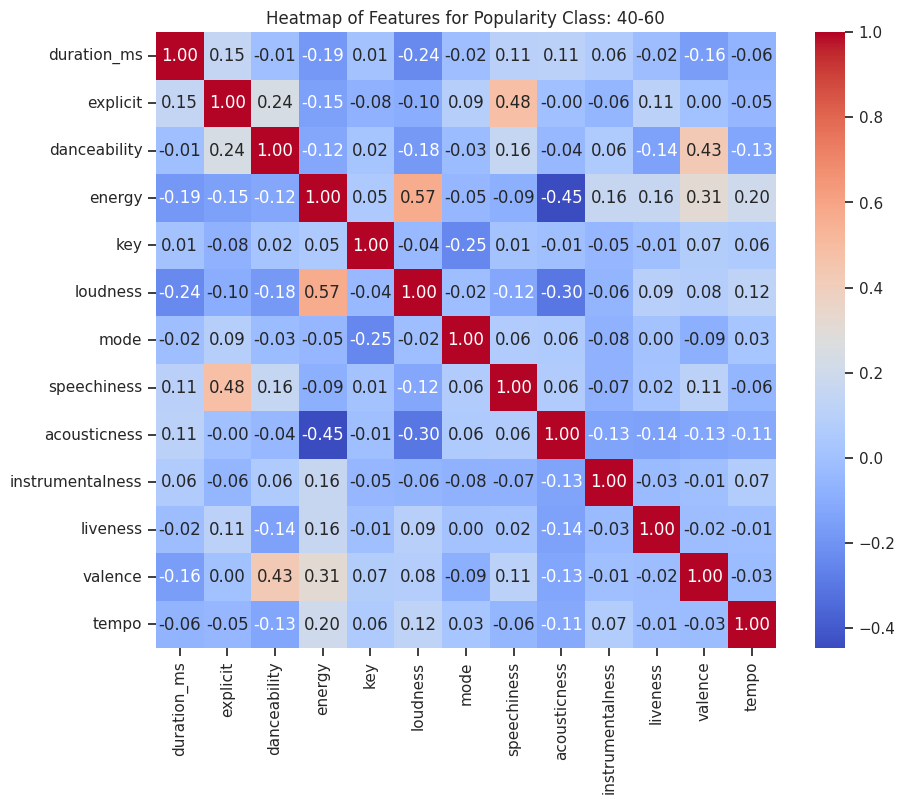

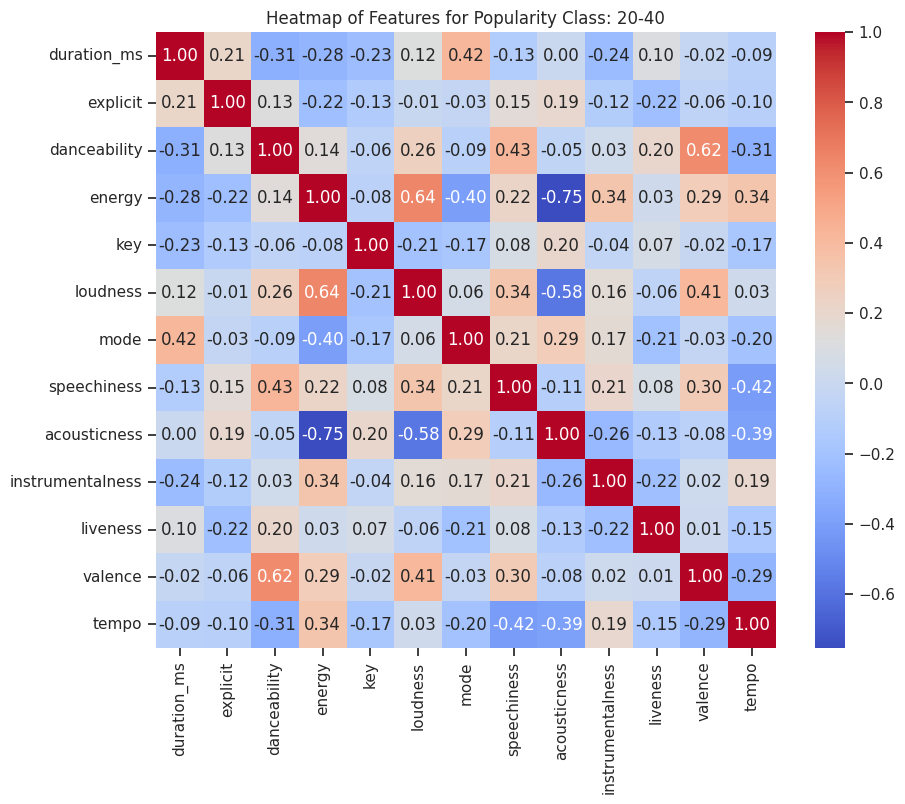

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of features
features = data.drop(columns=["genre_vector", "popularity_class"]).columns

# Get the unique popularity classes
popularity_classes = data["popularity_class"].unique()

# Iterate over popularity classes
for cls in popularity_classes:
    # Filter the data for the specific popularity class
    data_cls = data[data["popularity_class"] == cls]
    
    # Compute the correlation matrix
    corr_matrix = data_cls[features].corr()
    
    # Create a new figure and axes
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
    
    ax.set_title(f"Heatmap of Features for Popularity Class: {cls}")
    
    # Display the plot
    plt.show()


In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns=["genre_vector", "popularity_class"])
y = data["popularity_class"]

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets (80% for training, 20% for validation)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the data subsets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (1600, 13) (1600,)
Validation Set Shape: (200, 13) (200,)
Test Set Shape: (200, 13) (200,)


In [40]:
# Count the number of data instances in each popularity class
popularity_counts = data["popularity_class"].value_counts()

# Print the number of data instances in each popularity class
for cls, count in popularity_counts.items():
    print(f"Popularity Class: {cls}, Count: {count}")

Popularity Class: 60-80, Count: 1205
Popularity Class: 40-60, Count: 442
Popularity Class: 0-20, Count: 184
Popularity Class: 80-100, Count: 135
Popularity Class: 20-40, Count: 34


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = knn_model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:")
print(confusion_mat)


Training Accuracy: 0.625625
Test Accuracy: 0.605
Confusion Matrix:
[[  9   1   8 126   0]
 [  2   0   2  24   0]
 [  2   0 108 250   0]
 [ 10   0  69 883   2]
 [  2   0  14  87   1]]


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train a decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)


Training Accuracy: 0.99875
Test Accuracy: 0.465
Confusion Matrix:
[[ 3  1  1 16  0]
 [ 0  0  1  0  0]
 [ 1  0 16 24  3]
 [11  2 23 73 11]
 [ 2  1  2  8  1]]


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Train an SVM model with RBF kernel

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)


Training Accuracy: 0.6025
Test Accuracy: 0.6
Confusion Matrix:
[[  0   0   0  21   0]
 [  0   0   0   1   0]
 [  0   0   0  44   0]
 [  0   0   0 120   0]
 [  0   0   0  14   0]]


In [41]:
import pandas as pd

# Create an empty dictionary to store the genre counts
genre_counts = {}

# Iterate over each row and count the occurrence of each genre
for index, row in data.iterrows():
    genre_vector = row["genre_vector"]
    for i, char in enumerate(genre_vector):
        if char == "1":
            genre = list(genre_indices.keys())[list(genre_indices.values()).index(i)]
            if genre not in genre_counts:
                genre_counts[genre] = 1
            else:
                genre_counts[genre] += 1

# Find the most frequent genre
most_frequent_genre = max(genre_counts, key=genre_counts.get)
most_frequent_count = genre_counts[most_frequent_genre]

# Find the least frequent genre
less_frequent_genre = min(genre_counts, key=genre_counts.get)
less_frequent_count = genre_counts[less_frequent_genre]

# Print the most frequent genre and its count
print("Most Frequent Genre:", most_frequent_genre)
print("Count:", most_frequent_count)

# Print the least frequent genre and its count
print("Least Frequent Genre:", less_frequent_genre)
print("Count:", less_frequent_count)


Most Frequent Genre: pop
Count: 1633
Least Frequent Genre: classical
Count: 1


In [42]:
# Initialize variables
max_genre_count = 0
max_genre = ""

# Iterate over the genre vectors
for index, row in data.iterrows():
    genre_vector = row["genre_vector"]
    genre_count = genre_vector.count("1")
    
    if genre_count > max_genre_count:
        max_genre_count = genre_count
        
# Print the maximum genre count and the corresponding genre
print("Maximum Genre Count:", max_genre_count)


Maximum Genre Count: 4


In [43]:
# Count variables
count_both_hiphop_pop = 0
count_hiphop_pop_rnb = 0

# Iterate over the data
for index, row in data.iterrows():
    genre_vector = row["genre_vector"]
    
    # Check if the track has both "hip hop" and "pop" genres
    if genre_vector[genre_indices["hip hop"]] == "1" and genre_vector[genre_indices["pop"]] == "1":
        count_both_hiphop_pop += 1
        
        # Check if the track also has the "R&B" genre
        if genre_vector[genre_indices["R&B"]] == "1":
            count_hiphop_pop_rnb += 1

# Calculate the probability
if count_both_hiphop_pop > 0:
    chance_rnb_given_hiphop_pop = count_hiphop_pop_rnb / count_both_hiphop_pop
else:
    chance_rnb_given_hiphop_pop = 0

# Print the probability
print("Chance of having R&B given both 'hip hop' and 'pop' genres:", chance_rnb_given_hiphop_pop)


Chance of having R&B given both 'hip hop' and 'pop' genres: 0.39619651347068147


Accuracy using Decision Tree: 0.315
Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  2 16  1  0  0  0  0  0  0  0  1  0  0
   0  0  0  3  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 2  0  0  3  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  2  0  0
   0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0

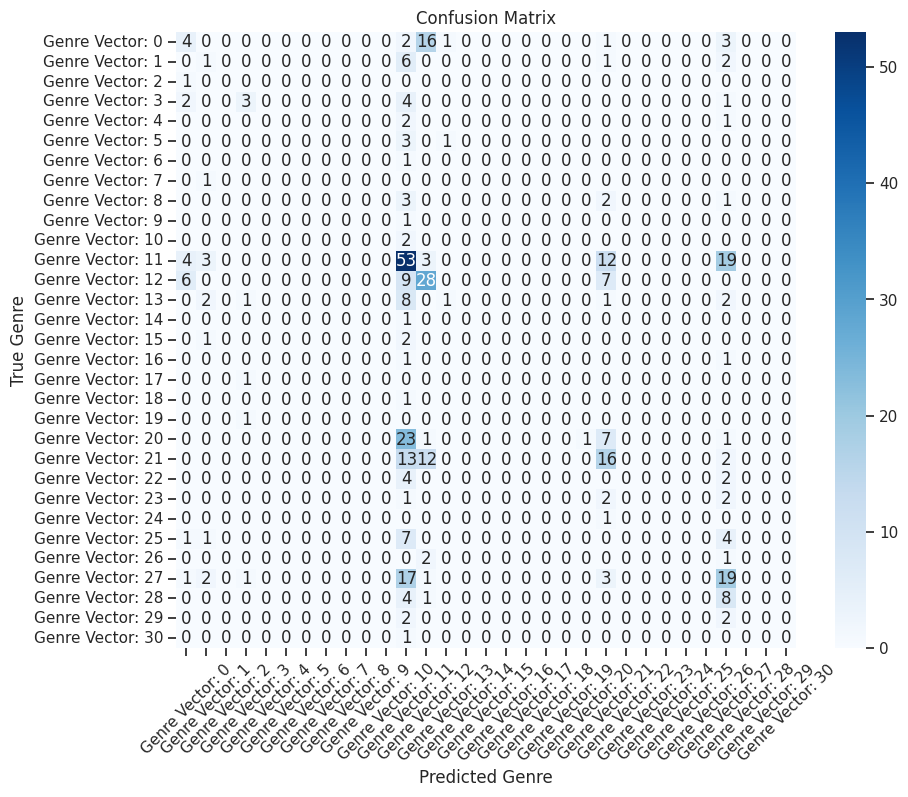

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split the data into training and validation sets
X = data.drop(columns=["genre_vector","popularity_class"])
y = data["genre_vector"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)


# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = dt_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print("Accuracy using Decision Tree:", accuracy)


# Create a confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Get the number of unique genres (assuming it's the same as the number of rows/columns in the confusion matrix)
num_genres = confusion_mat.shape[0]

# Create a list of genre labels using the genre vectors themselves
genre_labels = [f"Genre Vector: {vector}" for vector in range(num_genres)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=genre_labels, yticklabels=genre_labels, ax=ax)

# Set the axis labels and title
ax.set_xlabel("Predicted Genre")
ax.set_ylabel("True Genre")
ax.set_title("Confusion Matrix")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()